<a href="https://colab.research.google.com/github/AmanCSE-1/Loan-Defaulter-Prediction-based-on-Customer-Behavior/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<em><b>Objective :</b> A Financial organization wants to predict the possible defaulters for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.</em>

# Importing Libraries and Loading Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =  pd.read_csv('/content/Dataset.csv')

In [5]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.shape

(252000, 13)

In [7]:
df.drop(columns=['Id'], inplace=True)

In [8]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [9]:
df.rename(columns={'CITY':'City',
                   'STATE': 'State', 
                   'Married/Single': 'Marital Status',
                   'CURRENT_HOUSE_YRS': 'Current_House_Years',
                   'CURRENT_JOB_YRS': 'Current_Job_Years'}, inplace=True)

df.columns

Index(['Income', 'Age', 'Experience', 'Marital Status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'City', 'State', 'Current_Job_Years',
       'Current_House_Years', 'Risk_Flag'],
      dtype='object')

## Descriptive Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Income               252000 non-null  int64 
 1   Age                  252000 non-null  int64 
 2   Experience           252000 non-null  int64 
 3   Marital Status       252000 non-null  object
 4   House_Ownership      252000 non-null  object
 5   Car_Ownership        252000 non-null  object
 6   Profession           252000 non-null  object
 7   City                 252000 non-null  object
 8   State                252000 non-null  object
 9   Current_Job_Years    252000 non-null  int64 
 10  Current_House_Years  252000 non-null  int64 
 11  Risk_Flag            252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [11]:
df.describe()

,Income,Age,Experience,Current_Job_Years,Current_House_Years,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [12]:
df.isna().sum()

Income                 0
Age                    0
Experience             0
Marital Status         0
House_Ownership        0
Car_Ownership          0
Profession             0
City                   0
State                  0
Current_Job_Years      0
Current_House_Years    0
Risk_Flag              0
dtype: int64

# Exploratory Data Analysis

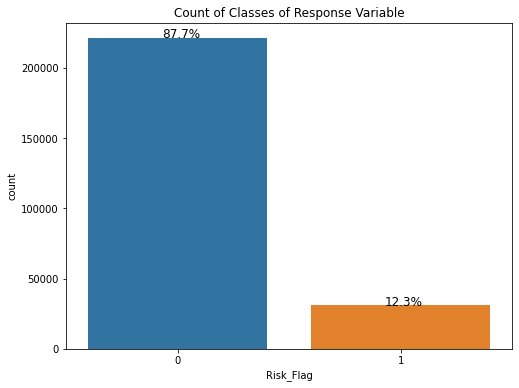

In [13]:
plt.figure(figsize=(8, 6))
risk_plot = sns.countplot(x=df['Risk_Flag'], data=df)
plt.title('Count of Classes of Response Variable')

for p in risk_plot.patches:
    txt = str(round(p.get_height()/df.shape[0]*100, 2)) + '%'
    txt_x = p.get_x() + p.get_width()/2 -0.07
    txt_y = p.get_height() + 200
    risk_plot.text(txt_x, txt_y, txt, size=12)
    
plt.show()

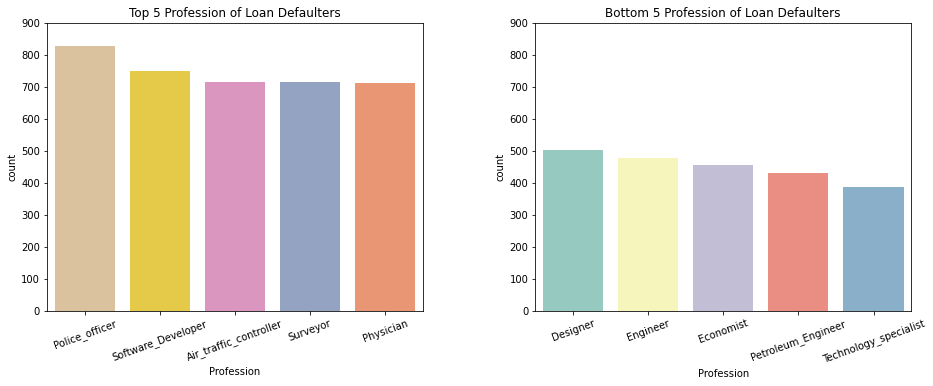

In [14]:
plt.subplots_adjust(left=0, right=2, bottom=0, top=1, wspace=0.3, hspace=0.1)

plt.subplot(1,2,1)
sns.countplot(data=df[df['Risk_Flag']==1], x='Profession', palette='Set2_r', 
              order=pd.value_counts(df[df['Risk_Flag']==1]['Profession']).iloc[:5].index)
plt.ylim([0,900])
plt.xticks(rotation=20)
plt.title('Top 5 Profession of Loan Defaulters')


plt.subplot(1,2,2)
sns.countplot(data=df[df['Risk_Flag']==1], x='Profession', palette='Set3', 
              order=pd.value_counts(df[df['Risk_Flag']==1]['Profession']).iloc[-5:].index)
plt.ylim([0,900])
plt.xticks(rotation=20)
plt.title('Bottom 5 Profession of Loan Defaulters')

plt.show()

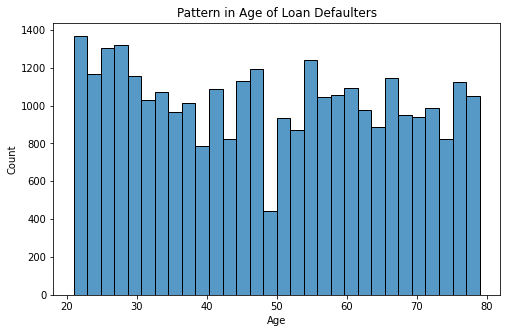

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['Risk_Flag']==1], x='Age')
plt.title('Pattern in Age of Loan Defaulters')
plt.show()

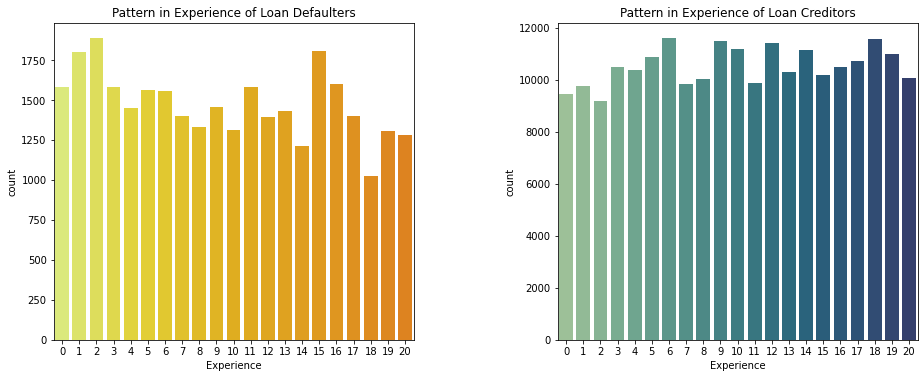

In [16]:
plt.subplots_adjust(left=0, right=2, bottom=0, top=1.1, wspace=0.4, hspace=0.2)

plt.subplot(1,2,1)
sns.countplot(data=df[df['Risk_Flag']==1], x='Experience', palette='Wistia')
plt.title('Pattern in Experience of Loan Defaulters')

plt.subplot(1,2,2)
sns.countplot(data=df[df['Risk_Flag']==0], x='Experience', palette='crest')
plt.title('Pattern in Experience of Loan Creditors')
plt.show()

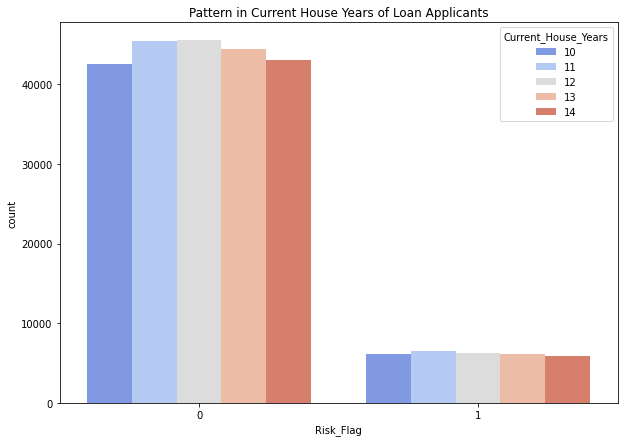

In [17]:
sns.countplot(data=df, x="Risk_Flag", hue=df.iloc[:, 10], palette='coolwarm')
fig = plt.gcf()
plt.title('Pattern in Current House Years of Loan Applicants')
fig.set_size_inches(10, 7)

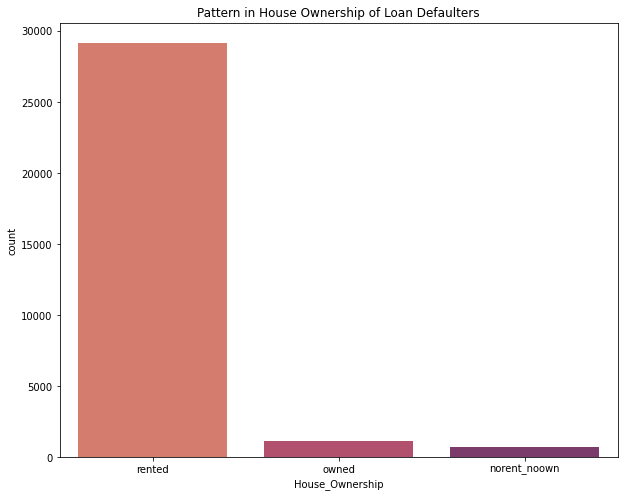

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data=df[df['Risk_Flag']==1], x="House_Ownership",  palette="flare")
plt.title('Pattern in House Ownership of Loan Defaulters')
plt.show()

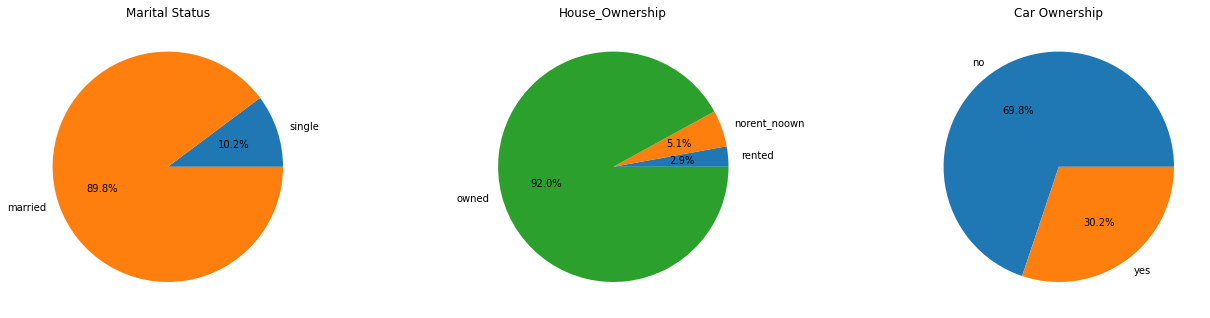

In [19]:
plt.subplots_adjust(left=0, right=3, bottom=1, top=2, wspace=0.1, hspace=0.4)

plt.subplot(1,3,1)
marital_status = df['Marital Status'].unique()
plt.title('Marital Status')
plt.pie(df.groupby(df['Marital Status']).size(), 
        labels=marital_status, autopct='%1.01f%%', labeldistance=1.11)

plt.subplot(1,3,2)
house_own = df['House_Ownership'].unique()
plt.title('House_Ownership')
plt.pie(df.groupby(df['House_Ownership']).size(), 
        labels=house_own, autopct='%1.01f%%', labeldistance=1.11)

plt.subplot(1,3,3)
marital_status = df['Car_Ownership'].unique()
plt.title('Car Ownership')
plt.pie(df.groupby(df['Car_Ownership']).size(), 
        labels=marital_status, autopct='%1.01f%%', labeldistance=1.11)

plt.show()

In [20]:
df['State'].nunique()

29

In [21]:
state = dict()

j=0
for i in df['State'].value_counts().index:
    state[i] = [df['State'].value_counts()[j]]
    j+=1

j=0
for i in df[df['Risk_Flag']==1]['State'].value_counts().index:
    state[i].append(df[df['Risk_Flag']==1]['State'].value_counts()[j])
    j+=1

for i in state:
    state[i].append(state[i][1]/state[i][0]*100)

In [22]:
statewise_defaulter = pd.DataFrame(index=np.arange(29))

j=0
for i in state:
    statewise_defaulter.loc[j, 'State'] = i
    statewise_defaulter.loc[j, 'Total Applicants'] = state[i][0]
    statewise_defaulter.loc[j, 'Total Defaulters'] = state[i][1]
    statewise_defaulter.loc[j, 'Percent Defaulter'] = state[i][2]
    j+=1

statewise_defaulter

,State,Total Applicants,Total Defaulters,Percent Defaulter
0,Uttar_Pradesh,28400.0,3343.0,11.771127
1,Maharashtra,25562.0,2895.0,11.325405
2,Andhra_Pradesh,25297.0,2935.0,11.602166
3,West_Bengal,23483.0,3009.0,12.813525
4,Bihar,19780.0,2583.0,13.058645
5,Tamil_Nadu,16537.0,1706.0,10.316261
6,Madhya_Pradesh,14122.0,2180.0,15.436907
7,Karnataka,11855.0,1189.0,10.029523
8,Gujarat,11408.0,1343.0,11.772440
9,Rajasthan,9174.0,1292.0,14.083279


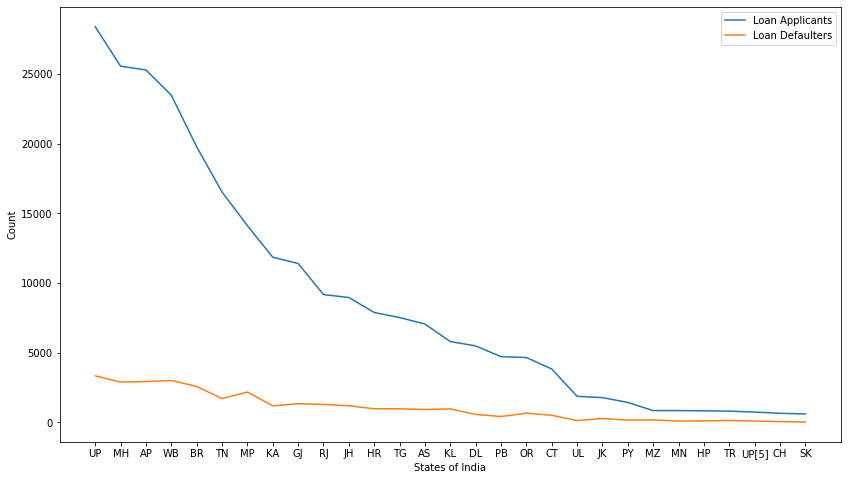

In [23]:
state_abb = ['UP', 'MH', 'AP', 'WB', 'BR', 'TN', 'MP', 'KA', 'GJ', 'RJ', 'JH', 'HR', 'TG', 'AS', 'KL', 
             'DL', 'PB', 'OR', 'CT', 'UL', 'JK', 'PY', 'MZ', 'MN', 'HP', 'TR', 'UP[5]', 'CH', 'SK']

plt.figure(figsize=(14, 8))
sns.lineplot(data=statewise_defaulter, x=state_abb, y='Total Applicants', label='Loan Applicants')
sns.lineplot(data=statewise_defaulter, x=state_abb, y='Total Defaulters', label='Loan Defaulters')

plt.ylabel('Count')
plt.xlabel('States of India')
plt.show()

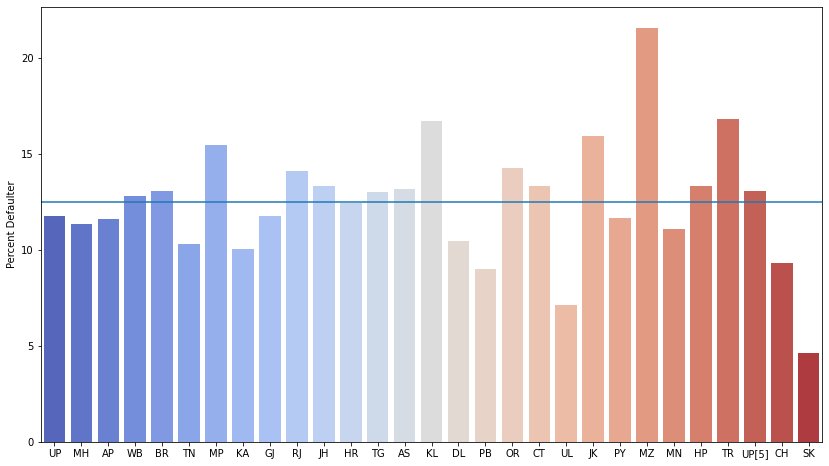

In [24]:
plt.figure(figsize=(14, 8))
sns.barplot(x=state_abb, y=statewise_defaulter['Percent Defaulter'], palette='coolwarm')
plt.axhline(statewise_defaulter['Percent Defaulter'].mean())
plt.show()

# Data Modelling

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [26]:
x = df.loc[:, ['Income', 'Age', 'Experience']]
y = df.loc[:, 'Risk_Flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.8, random_state=1)
print(x_train.shape, x_valid.shape, x_test.shape)

(171360, 3) (42840, 3) (37800, 3)


## Logistic Regression

In [27]:
logmodel = LogisticRegression()

logmodel.fit(x_train, y_train)
defaulter_predict = logmodel.predict(x_test)

print("Accuracy of Logistic Regression Model is {}%".format(round(accuracy_score(y_test, defaulter_predict), 3)*100))

Accuracy of Logistic Regression Model is 87.9%


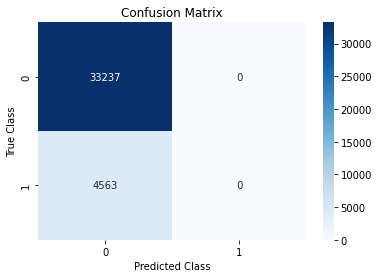

In [28]:
cf_matrix = confusion_matrix(y_test, defaulter_predict)

sns.heatmap(data=cf_matrix, annot=True, fmt='2', cmap='Blues')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

plt.show()

In [29]:
print("Recall score of Logistic Regression Model is {}%".format(round(recall_score(y_test, defaulter_predict), 4)*100))

Recall score of Logistic Regression Model is 0.0%


In [30]:
defaulter_probab_log = logmodel.predict_proba(x_test)[:, 1]

auc = roc_auc_score(y_test, defaulter_probab_log)
print("AUC Score of model is %.2f" %auc)

AUC Score of model is 0.51


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)

dt.fit(x_train, y_train)
defaulter_predict_dt = dt.predict(x_test)

In [32]:
print("Accuracy of Decsion Tree Model is {}%".format(round(accuracy_score(y_test, defaulter_predict_dt), 3)*100))

print("Recall Score is {}%".format(round(recall_score(y_test, defaulter_predict_dt), 4)*100))

Accuracy of Decsion Tree Model is 88.2%
Recall Score is 56.08%


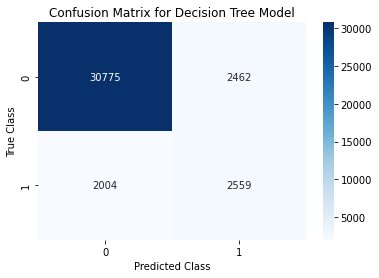

In [33]:
cf_matrix_dt = confusion_matrix(y_test, defaulter_predict_dt)

sns.heatmap(data=cf_matrix_dt, annot=True, fmt='2', cmap='Blues')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Decision Tree Model')

plt.show()

In [34]:
print(classification_report(y_test, defaulter_predict_dt))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     33237
           1       0.51      0.56      0.53      4563

    accuracy                           0.88     37800
   macro avg       0.72      0.74      0.73     37800
weighted avg       0.89      0.88      0.88     37800



In [35]:
defaulter_probab_dt = dt.predict_proba(x_test)[:, 1]

auc = roc_auc_score(y_test, defaulter_probab_dt)
print("AUC Score of model is %.2f" %auc)

AUC Score of model is 0.85


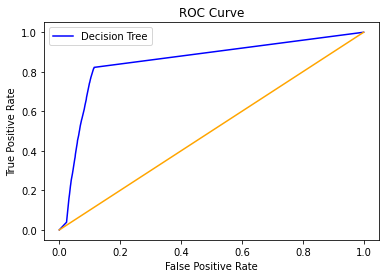

In [36]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, defaulter_probab_dt)

plt.plot(fpr, tpr, color='blue', label='Decision Tree')
plt.plot([0, 1], [0, 1], color='orange')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()

## Decision Tree with SMOTE

In [44]:
from imblearn.over_sampling import SMOTE 
import warnings

warnings.filterwarnings("ignore")

In [45]:
sm = SMOTE(random_state=1)

x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

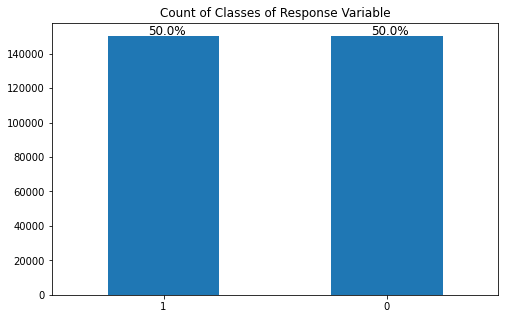

In [46]:
plt.figure(figsize=(8, 5))

risk_plot = pd.Series(y_train_sm).value_counts().plot(kind='bar')
plt.title('Count of Classes of Response Variable')
plt.xticks(rotation=0)

for p in risk_plot.patches:
    txt = str(round(p.get_height()/y_train_sm.shape[0], 4)*100) + '%'
    txt_x = p.get_x() + p.get_width()/2 -0.07
    txt_y = p.get_height() + 500
    risk_plot.text(txt_x, txt_y, txt, size=12)
    
plt.show()

In [47]:
dt_sm = DecisionTreeClassifier()

dt_sm.fit(x_train_sm, y_train_sm)

defaulter_predict_dt_sm = dt_sm.predict(x_test)

In [48]:
print("Accuracy of Decision Tree Model with SMOTE is {}%" .format(round(accuracy_score(y_test, defaulter_predict_dt_sm), 2)*100))

print("Recall Score is {}%".format(round(recall_score(y_test, defaulter_predict_dt_sm), 2)*100))

Accuracy of Decision Tree Model with SMOTE is 86.0%
Recall Score is 87.0%


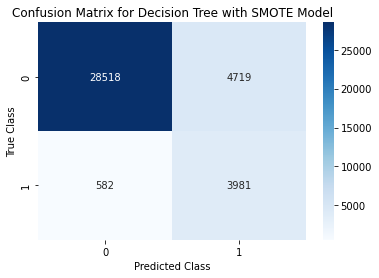

In [49]:
cf_matrix_dt_sm = confusion_matrix(y_test, defaulter_predict_dt_sm)

sns.heatmap(data=cf_matrix_dt_sm, annot=True, fmt='2', cmap='Blues')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Decision Tree with SMOTE Model')

plt.show()

In [50]:
print(classification_report(y_test, defaulter_predict_dt_sm))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91     33237
           1       0.46      0.87      0.60      4563

    accuracy                           0.86     37800
   macro avg       0.72      0.87      0.76     37800
weighted avg       0.92      0.86      0.88     37800



In [51]:
defaulter_probab_dt_sm = dt_sm.predict_proba(x_test)[:, 1]

auc = roc_auc_score(y_test, defaulter_probab_dt_sm)
print("AUC Score of model is %.2f" %auc)

AUC Score of model is 0.85


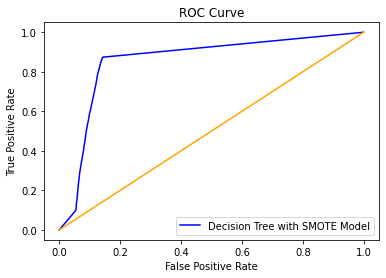

In [52]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, defaulter_probab_dt_sm)

plt.plot(fpr, tpr, color='blue', label='Decision Tree with SMOTE Model')
plt.plot([0, 1], [0, 1], color='orange')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()